In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os

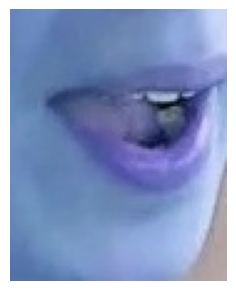

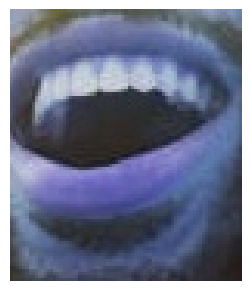

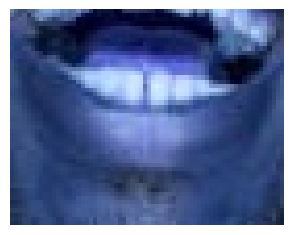

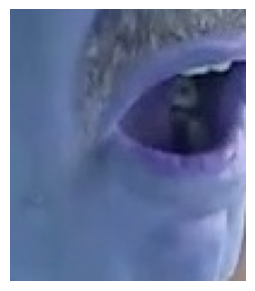

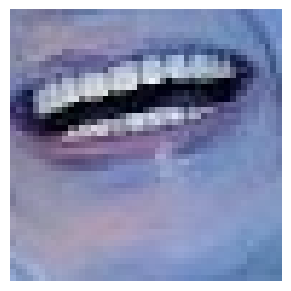

In [42]:
images = glob("yawn/**")
for i in range(5):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [57]:
from tensorflow.keras.utils import Sequence
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
class CustomDataGenerator(Sequence):
    def __init__(self, file_paths, labels, batch_size, target_size):
        self.file_paths = file_paths
        self.labels = labels
        self.batch_size = batch_size
        self.target_size = target_size

    def __len__(self):
        return int(np.ceil(len(self.file_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_files = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size: (index + 1) * self.batch_size]

        batch_images = [np.array(Image.open(file).resize(self.target_size)) / 255.0 for file in batch_files]

        return np.array(batch_images), np.array(batch_labels)


open_mouth_dataset_path = 'yawn'
closed_mouth_dataset_path = 'no yawn'


open_mouth_files = glob(os.path.join(open_mouth_dataset_path, '*.jpg'))


open_mouth_labels = [1] * len(open_mouth_files)


closed_mouth_files = glob(os.path.join(closed_mouth_dataset_path, '*.jpg'))


closed_mouth_labels = [0] * len(closed_mouth_files)


all_files = open_mouth_files + closed_mouth_files
all_labels = open_mouth_labels + closed_mouth_labels


train_files, val_files, train_labels, val_labels = train_test_split(
    all_files, all_labels, test_size=0.2, random_state=42
)


train_datagen = CustomDataGenerator(train_files, train_labels, batch_size=batch_size, target_size=(128, 128))
validation_datagen = CustomDataGenerator(val_files, val_labels, batch_size=batch_size, target_size=(128, 128))


model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_datagen, epochs=10, validation_data=validation_datagen)

Epoch 1/10
128/128 [==============================] - 73s 560ms/step - loss: 0.3154 - accuracy: 0.8725 - val_loss: 0.1760 - val_accuracy: 0.9365
Epoch 2/10
128/128 [==============================] - 71s 554ms/step - loss: 0.1670 - accuracy: 0.9433 - val_loss: 0.1431 - val_accuracy: 0.9443
Epoch 3/10
128/128 [==============================] - 68s 532ms/step - loss: 0.1318 - accuracy: 0.9541 - val_loss: 0.1454 - val_accuracy: 0.9521
Epoch 4/10
128/128 [==============================] - 69s 537ms/step - loss: 0.1046 - accuracy: 0.9653 - val_loss: 0.1515 - val_accuracy: 0.9502
Epoch 5/10
128/128 [==============================] - 72s 562ms/step - loss: 0.1009 - accuracy: 0.9690 - val_loss: 0.1556 - val_accuracy: 0.9551
Epoch 6/10
128/128 [==============================] - 69s 541ms/step - loss: 0.0983 - accuracy: 0.9678 - val_loss: 0.1215 - val_accuracy: 0.9619
Epoch 7/10
128/128 [==============================] - 69s 538ms/step - loss: 0.0809 - accuracy: 0.9729 - val_loss: 0.1525 - val_ac

In [61]:
eval_result = model.evaluate(validation_datagen)
print(f"Validation Accuracy: {eval_result[1] * 100:.2f}%")

32/32 [==============================] - 4s 128ms/step - loss: 0.1421 - accuracy: 0.9658
Validation Accuracy: 96.58%


In [62]:
model.save('mouth_open_close_model.h5')

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 128)      

In [64]:
model_json = model.to_json()
with open("mouth_open_close.json","w") as json_file:
    json_file.write(model_json)